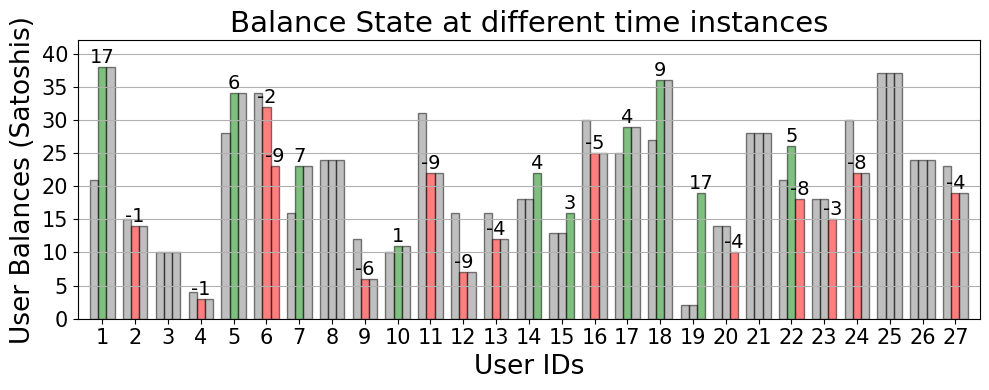

In [13]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

title_size = 21
ticks_size = 15
label_size =19
legend_size =16

df = pd.read_excel('1707519538.639506_Discovery_2024-02-09_17-58-59-603534.xlsx')

df2 = pd.read_excel('1707519538.639506_Tracking-1_2024-02-09_17-58-59-643543.xlsx')
df3 = pd.read_excel('1707519538.639506_Tracking-2_2024-02-09_17-58-59-672544.xlsx')


labels = df['User ID'].tolist()
values1 = df['Balance'].tolist()
values2 = df2['Balance'].tolist()
values3 = df3['Balance'].tolist()


# Calculate differences
diff1_2 = [v2 - v1 for v1, v2 in zip(values1, values2)]
diff2_3 = [v3 - v2 for v2, v3 in zip(values2, values3)]

# Plotting all sets of bars on the same axes with transparency
plt.figure(figsize=(10, 4))
bar_width = 0.25
index = np.arange(len(labels))

# Function to determine the color of the bars based on the change
def get_color(diff):
    if diff > 0:
        return 'green'
    elif diff < 0:
        return 'red'
    else:
        return 'grey'  # for no change

# Plotting the first set of bars
plt.bar(index, values1, bar_width, color='grey', label='Set 1', alpha=0.5, edgecolor='black')

# Plotting the second set of bars with color based on change
for i, (value, diff) in enumerate(zip(values2, diff1_2)):
    plt.bar(index[i] + bar_width, value, bar_width, color=get_color(diff), alpha=0.5, edgecolor='black')

# Plotting the third set of bars with color based on change
for i, (value, diff) in enumerate(zip(values3, diff2_3)):
    plt.bar(index[i] + 2 * bar_width, value, bar_width, color=get_color(diff), alpha=0.5, edgecolor='black')

    
# Showing the differences
for i, diff in enumerate(diff1_2):
    if(diff!=0):
        plt.text(i + bar_width,  values2[i], f'{diff}', ha='center', va='bottom',fontsize=14)

for i, diff in enumerate(diff2_3):
    if(diff!=0):
        plt.text(i + 2*bar_width , values3[i], f'{diff}', ha='center', va='bottom',fontsize=14)
    
plt.xlabel('User IDs', fontsize=label_size)
plt.ylabel('User Balances (Satoshis)', fontsize=label_size)
plt.grid(axis='y')
plt.title('Balance State at different time instances', fontsize=title_size)
plt.xlim(-.5, 27)
plt.ylim(0, 42)

# Adding legend
# plt.legend(['Balance Discovery', 'Balace Tracking 1', 'Balace Tracking 2'])

plt.xticks(index + bar_width, labels,fontsize=ticks_size)
plt.yticks(fontsize=ticks_size)

plt.tight_layout()
plt.savefig('balance_tracking.png', dpi=300, bbox_inches='tight')
plt.savefig('balance_tracking.pdf', dpi=300, bbox_inches='tight')

plt.show()


In [66]:
df_tx = pd.read_excel('1707519538.639506_Actual_TXs1_2024-02-09_17-58-59-627542.xlsx')


print(df_tx)


Senders = df_tx['Sender ID'].tolist()
Receivers = df_tx['Receiver ID'].tolist()
amounts = df_tx['Amount'].tolist()

tumb_senders = list(set(Senders))
tumb_receivers = list(set(Receivers))


ins = [0]*len(tumb_senders)
outs = [0]*len(tumb_receivers)


# print(Senders, Receivers, tumb_senders,tumb_receivers,  ins, outs)

for idx, val in enumerate(Senders):
#     print(idx, val)
    if val in tumb_senders:
        index = tumb_senders.index(val)
        ins[index]+=amounts[idx]
#         print(index)
        
for idx, val in enumerate(Receivers):
#     print(idx, val)
    if val in tumb_receivers:
        index = tumb_receivers.index(val)
        outs[index]+=amounts[idx]
#         print(index)
        
# print(Senders, Receivers, tumb_senders,tumb_receivers,   ins, outs)

print("Tumbler Received from: ",tumb_senders," and amounts are:",ins)
print("Tumbler Sent to: ",tumb_receivers," and amounts are:",outs)


                   Time  Sender ID  Receiver ID  Amount
0  20240209175859615542         16            7       7
1  20240209175859616535          2           10       1
2  20240209175859616535         11            1       9
3  20240209175859617535          4           22       1
4  20240209175859617535          9            5       6
5  20240209175859619544         24            1       8
6  20240209175859622536         12           18       9
7  20240209175859625542         27           17       4
8  20240209175859626542          6           16       2
9  20240209175859626542         13           22       4
Tumbler Received from:  [2, 4, 6, 9, 11, 12, 13, 16, 24, 27]  and amounts are: [1, 1, 2, 6, 9, 9, 4, 7, 8, 4]
Tumbler Sent to:  [1, 5, 7, 10, 16, 17, 18, 22]  and amounts are: [17, 6, 7, 1, 2, 4, 9, 5]


In [67]:
print(values1)
print(values2)

[21, 15, 10, 4, 28, 34, 16, 24, 12, 10, 31, 16, 16, 18, 13, 30, 25, 27, 2, 14, 28, 21, 18, 30, 37, 24, 23]
[38, 14, 10, 3, 34, 32, 23, 24, 6, 11, 22, 7, 12, 18, 13, 25, 29, 36, 2, 14, 28, 26, 18, 22, 37, 24, 19]
